Importing Libraries

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Setting seaborn color palette
palette = sns.set_palette('Set2')

Data Exploration and Preprocessing


In [2]:
data = pd.read_csv("C:\\Users\\PREETAM\\Downloads\\Sample - Superstore.csv", encoding='windows-1252')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [5]:
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [6]:
data['Postal Code'] = data['Postal Code'].astype(str)

In [7]:
data.dtypes

Row ID                        int64
Order ID                     object
Order Date           datetime64[ns]
Ship Date            datetime64[ns]
Ship Mode                    object
Customer ID                  object
Customer Name                object
Segment                      object
Country                      object
City                         object
State                        object
Postal Code                  object
Region                       object
Product ID                   object
Category                     object
Sub-Category                 object
Product Name                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
Order Year                    int32
Order Month                   int32
Order Day of Week             int32
dtype: object

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()


,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day of Week
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,3.206324
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,0.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,1.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,4.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,5.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,6.000000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,2.122925


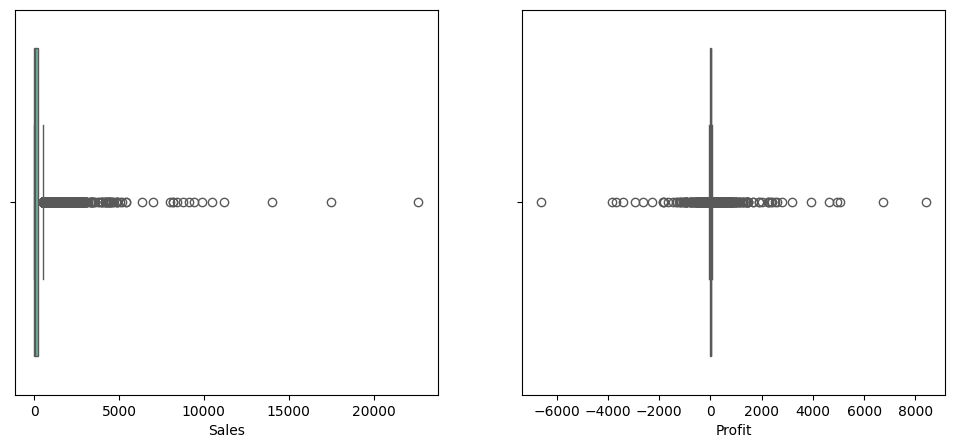

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=data['Sales'], ax=axs[0])
sns.boxplot(x=data['Profit'], ax=axs[1]);


In [11]:
# Select numeric columns
data_numeric = data.select_dtypes(include=[np.number])

for col in data_numeric.columns:
    # Calculate z-score of the column
    z_score = np.abs(stats.zscore(data[col]))
    outliers_num = len(np.where(z_score > 3)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num)) 

Sales: 127
Quantity: 113
Discount: 300
Profit: 107


In [12]:
data_numeric = data_numeric.drop(['Quantity', 'Discount'], axis=1)

z_scores = np.abs(stats.zscore(data_numeric))

# Save old DataFrame
old_data = data.copy()

# DataFrame without outliers
data = data[(z_scores < 3).all(axis=1)]
data.shape

(9829, 24)

Exploratory Data Analysis and Data Visualization



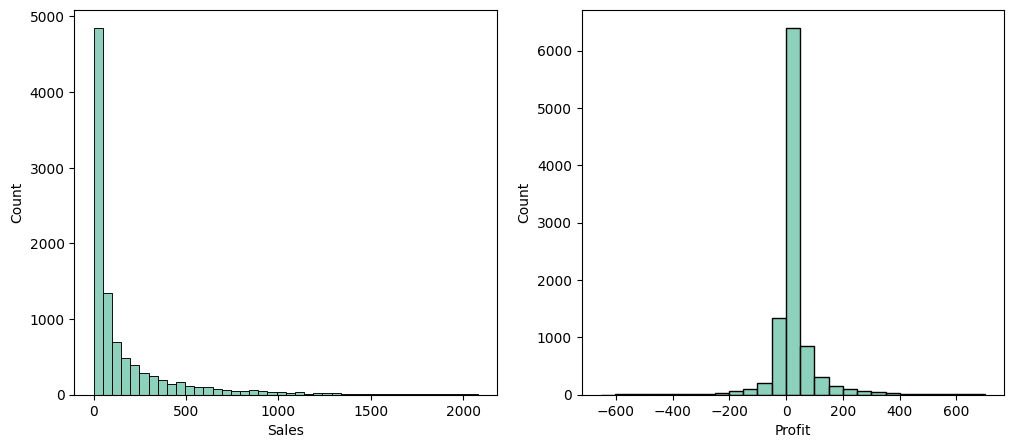

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(x=data['Sales'], ax=ax[0], binwidth=50)
sns.histplot(x=data['Profit'], ax=ax[1], binwidth=50);

In [14]:
group_by_year_month = data.groupby(['Order Year', 'Order Month'])
sales_profit_monthly = group_by_year_month[['Sales', 'Profit']].sum().reset_index()

In [15]:
def lineplot_monthly(data, parameter, hue=None, palette=None):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Order Month', y=parameter, hue=hue, marker='o', palette=palette)
    plt.title(f'Monthly {parameter} Trend')
    plt.xlabel('Month')
    plt.ylabel(parameter)
    plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    if hue:
        plt.legend(title='Year', loc='best')
    plt.grid(True)

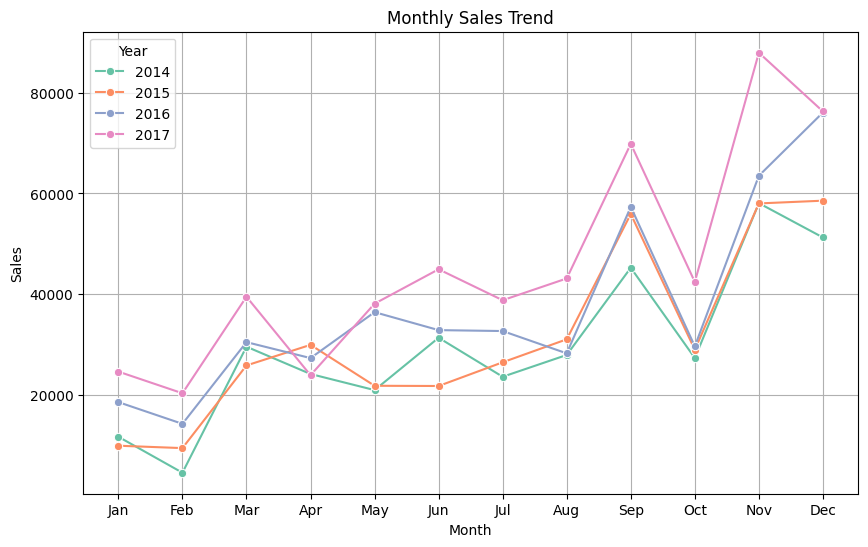

In [16]:
lineplot_monthly(sales_profit_monthly, 'Sales', hue='Order Year', palette='Set2')

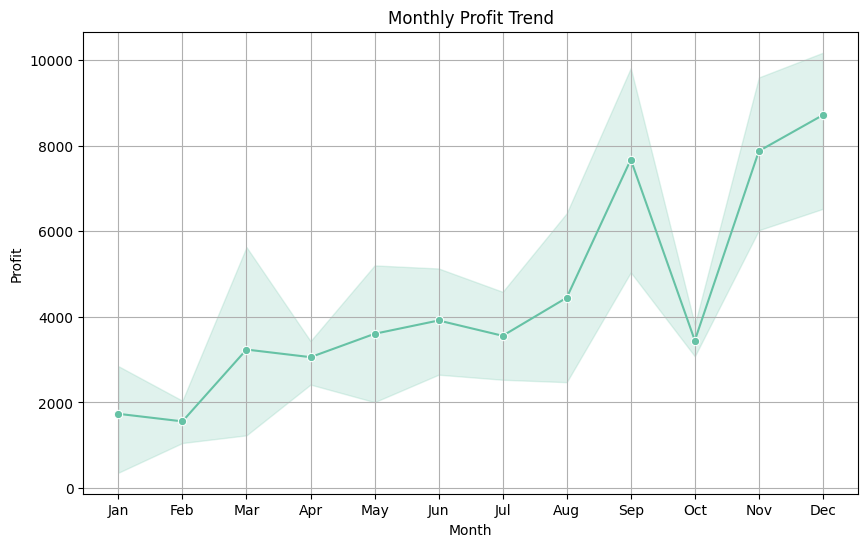

In [17]:
lineplot_monthly(sales_profit_monthly, 'Profit')

In [18]:
sales_profit_by_segment = data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()


In [19]:
sales_profit_by_segment_long = pd.melt(sales_profit_by_segment, id_vars=['Segment'], 
                                    var_name='Measure', value_vars=['Sales', 'Profit'], value_name='Count')
sales_profit_by_segment_long

,Segment,Measure,Count
0,Consumer,Sales,886803.9944
1,Corporate,Sales,540069.5988
2,Home Office,Sales,302938.1655
3,Consumer,Profit,105567.1431
4,Corporate,Profit,64605.8408
5,Home Office,Profit,41172.1953


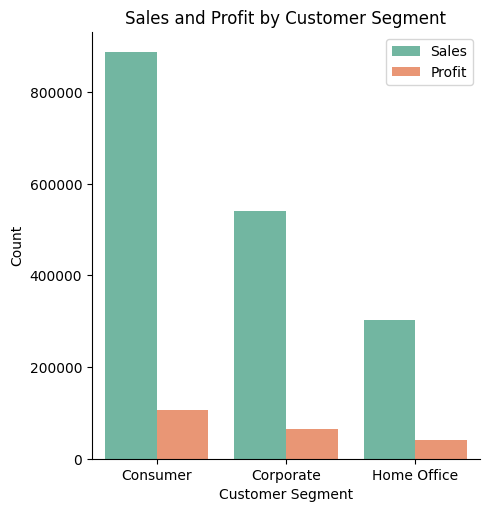

In [20]:
sns.catplot(kind='bar', data=sales_profit_by_segment_long, x='Segment', y='Count', hue='Measure', legend_out=False)
plt.title('Sales and Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.legend(loc='best');

In [21]:
sales_profit_by_segment['Profit/Sales'] = sales_profit_by_segment['Profit']/sales_profit_by_segment['Sales']
sales_profit_by_segment

,Segment,Sales,Profit,Profit/Sales
0,Consumer,886803.9944,105567.1431,0.119042
1,Corporate,540069.5988,64605.8408,0.119625
2,Home Office,302938.1655,41172.1953,0.135910


In [22]:
sales_profit_by_category = data.groupby(['Category'])[['Sales', 'Profit']].sum().reset_index()

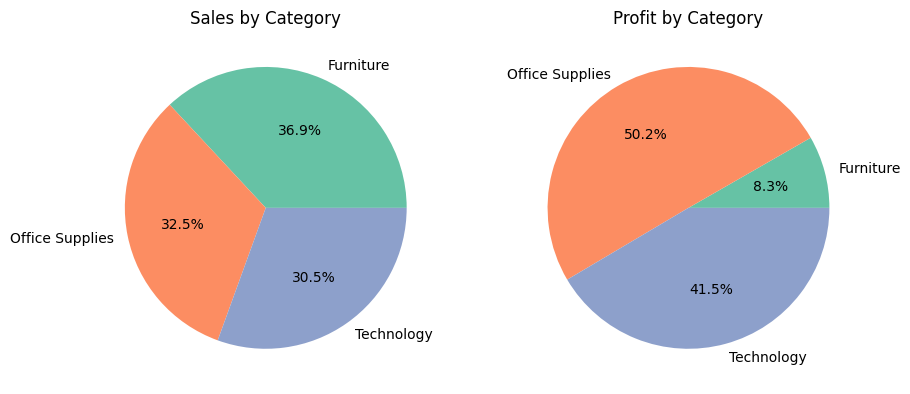

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].pie(sales_profit_by_category['Sales'], labels=sales_profit_by_category['Category'], autopct='%1.1f%%')
ax[0].title.set_text('Sales by Category')
ax[1].pie(sales_profit_by_category['Profit'], labels=sales_profit_by_category['Category'], autopct='%1.1f%%')
ax[1].title.set_text('Profit by Category')

In [24]:
sales_profit_by_subcategory = data.groupby(['Sub-Category'])[['Sales', 'Profit']].sum().reset_index()

sales_profit_by_subcategory_long = pd.melt(sales_profit_by_subcategory, id_vars=['Sub-Category'], 
                                    var_name='Measure', value_vars=['Sales', 'Profit'], value_name='Count')

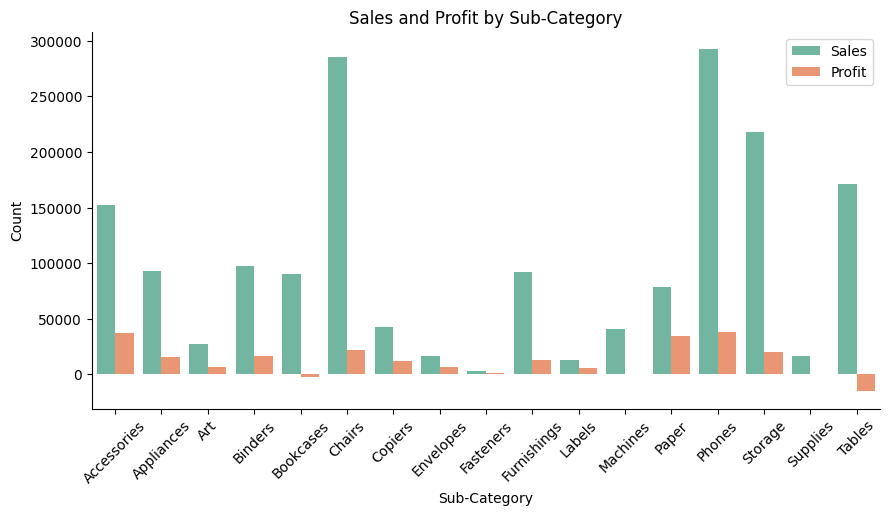

In [25]:
sns.catplot(kind='bar', data=sales_profit_by_subcategory_long, x='Sub-Category', y='Count', hue='Measure', legend_out=False, 
           height=4.5, aspect=2)
plt.title('Sales and Profit by Sub-Category')
plt.legend(loc='best');
plt.xticks(rotation=45);

In [26]:
sales_profit_by_subcategory['Profit/Sales'] = sales_profit_by_subcategory['Profit']/sales_profit_by_subcategory['Sales']

sales_profit_by_subcategory['Profitability'] = pd.cut(sales_profit_by_subcategory['Profit/Sales'], 
                                                     bins=[-np.inf, 0, 0.2, np.inf],
                                                     labels=['loss', 'moderate', 'high'])
sales_profit_by_subcategory

,Sub-Category,Sales,Profit,Profit/Sales,Profitability
0,Accessories,151919.0980,37188.8529,0.244794,high
1,Appliances,92688.8030,15829.3482,0.170780,moderate
2,Art,27118.7920,6527.7870,0.240711,high
3,Binders,97473.1140,16447.6932,0.168741,moderate
4,Bookcases,90607.2347,-2114.8200,-0.023341,loss
5,Chairs,285323.6760,21989.2644,0.077068,moderate
6,Copiers,42639.0080,12322.7236,0.289001,high
7,Envelopes,16476.4020,6964.1767,0.422676,high
8,Fasteners,3024.2800,949.5182,0.313965,high
9,Furnishings,91705.1640,13059.1436,0.142404,moderate


In [27]:
sales_profit_by_region_city = data.groupby(['Region', 'City'])[['Sales', 'Profit']].sum().reset_index()

In [28]:
def top(data, parameter, top=15):
    data = data.sort_values(by=[parameter], ascending=False)[:top]
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=parameter, y='City', hue='Region')
    plt.title(f'Top {top} Cities by {parameter}')
    plt.legend(loc='best')
    return data

,Region,City,Sales,Profit
254,East,New York City,167755.3920,34130.3778
494,West,Los Angeles,139742.0130,24592.5499
547,West,San Francisco,91968.9080,15678.3905
264,East,Philadelphia,87372.2270,-10851.5094
558,West,Seattle,82067.1600,16075.9991
75,Central,Houston,50323.0048,-3259.6195
27,Central,Chicago,40351.0450,-3798.1748
546,West,San Diego,37020.1870,4969.8885
44,Central,Detroit,25989.3220,6854.4448
36,Central,Dallas,19370.9522,-1705.0557


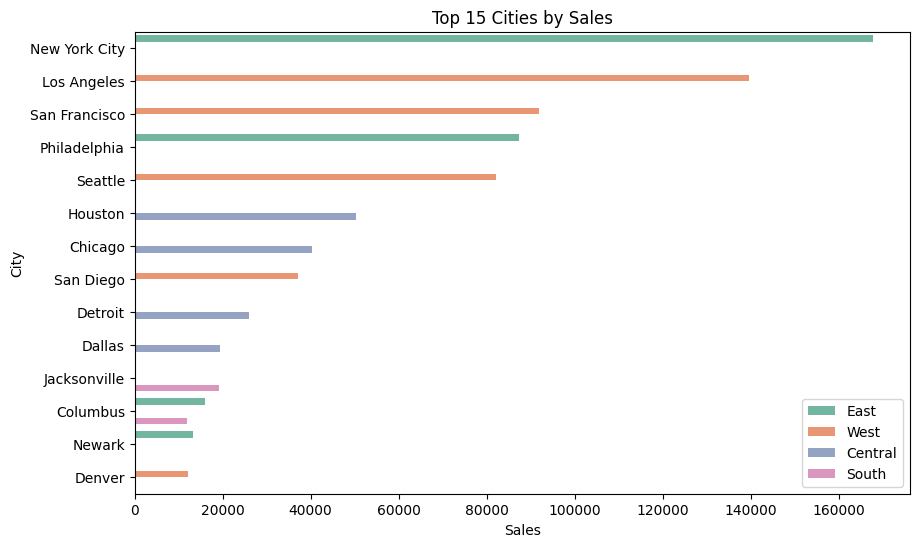

In [29]:
top(sales_profit_by_region_city, 'Sales')

,Region,City,Sales,Profit
254,East,New York City,167755.392,34130.3778
494,West,Los Angeles,139742.013,24592.5499
558,West,Seattle,82067.160,16075.9991
547,West,San Francisco,91968.908,15678.3905
44,Central,Detroit,25989.322,6854.4448
546,West,San Diego,37020.187,4969.8885
311,South,Columbus,11905.120,3339.7401
398,South,Springfield,10853.100,3271.7621
387,South,Richmond,9798.230,2990.8851
105,Central,Milwaukee,11410.220,2793.0851


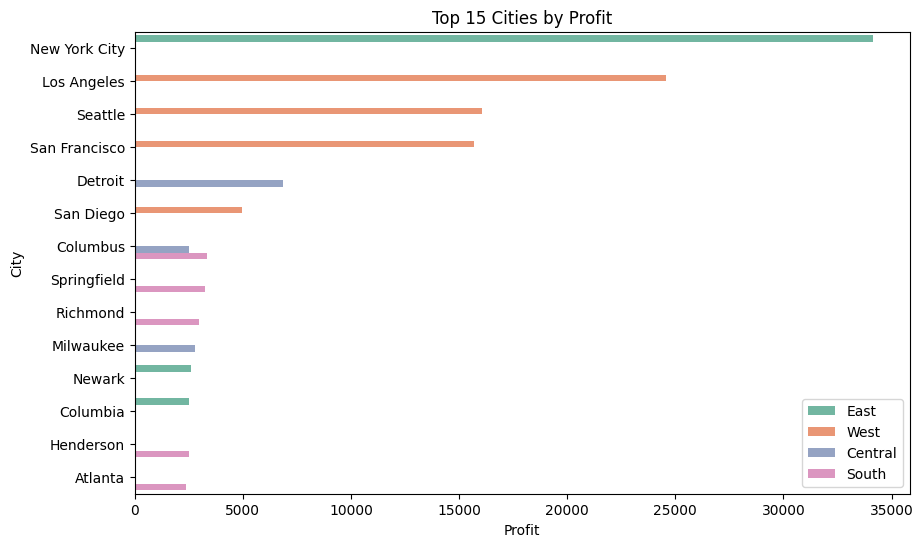

In [30]:
top(sales_profit_by_region_city, 'Profit')
